In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("C:train.csv")
test = pd.read_csv("C:test.csv")
submission = pd.read_csv("C:submission.csv")

In [4]:
train.head(3)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0


In [5]:
test.head(3)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0


In [6]:
submission.head(3)

,id,count
0,0,NaN
1,1,NaN
2,2,NaN


In [7]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


In [8]:
print(train.columns)
print(test.columns)
print(submission.columns)

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')
Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')
Index(['id', 'count'], dtype='object')


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [11]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [12]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [13]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [14]:
train['hour_bef_precipitation'].value_counts()

0.0    1411
1.0      46
Name: hour_bef_precipitation, dtype: int64

In [15]:
train['hour_bef_precipitation'].fillna(value = '0', inplace=True) 

In [16]:
train['hour_bef_precipitation'].isna().sum()

0

In [17]:
print(train['hour_bef_temperature'].mean())
print(train['hour_bef_windspeed'].mean())
print(train['hour_bef_humidity'].mean())
print(train['hour_bef_visibility'].mean())
print(train['hour_bef_ozone'].mean())
print(train['hour_bef_pm10'].mean())
print(train['hour_bef_pm2.5'].mean())

16.717433081674653
2.4790344827586246
52.23129718599863
1405.216884008236
0.03914895155459139
57.16873630387144
30.327123695976155


In [18]:
train_isna = train.isna().sum()
train_isna

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      0
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [19]:
train_na_col = train_isna[train_isna > 0].index
train_na_col

Index(['hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [20]:
train = train.fillna(train.mean())
train.head(15)

C:\Users\UserK\AppData\Local\Temp\ipykernel_22968\2232682423.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.mean())


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027000,76.000000,33.000000,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042000,73.000000,40.000000,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033000,32.000000,19.000000,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040000,75.000000,64.000000,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057000,27.000000,11.000000,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027000,34.000000,15.000000,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038000,62.000000,33.000000,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050000,90.000000,28.000000,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039000,93.000000,19.000000,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025000,64.000000,19.000000,83.0


In [21]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [22]:
test['hour_bef_precipitation'].value_counts()

0.0    677
1.0     37
Name: hour_bef_precipitation, dtype: int64

In [23]:
test['hour_bef_precipitation'].fillna(value = '0', inplace=True) 

In [24]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     0
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [25]:
test_isna = test.isna().sum()
test_isna

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     0
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [26]:
print(test['hour_bef_temperature'].mean())
print(test['hour_bef_windspeed'].mean())
print(test['hour_bef_humidity'].mean())
print(test['hour_bef_visibility'].mean())
print(test['hour_bef_ozone'].mean())
print(test['hour_bef_pm10'].mean())
print(test['hour_bef_pm2.5'].mean())

23.263305322128847
2.3885154061624654
56.668067226890756
1359.4943977591035
0.041195588235294074
36.9306784660767
24.93961708394698


In [27]:
test = test.fillna(test.mean())
test.head(20)

C:\Users\UserK\AppData\Local\Temp\ipykernel_22968\1057335762.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = test.fillna(test.mean())


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.000000,27.000000
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.000000,36.000000
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.000000,28.000000
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.000000,38.000000
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.000000,15.000000
5,10,9,20.2,0.0,4.3,39.0,2000.0,0.034,22.000000,7.000000
6,11,18,19.0,0.0,2.7,80.0,2000.0,0.028,17.000000,12.000000
7,12,18,31.2,0.0,2.2,42.0,621.0,0.117,94.000000,69.000000
8,15,6,20.1,0.0,0.8,78.0,463.0,0.026,57.000000,33.000000
9,17,8,17.0,1.0,0.9,100.0,200.0,0.022,12.000000,12.000000


In [28]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

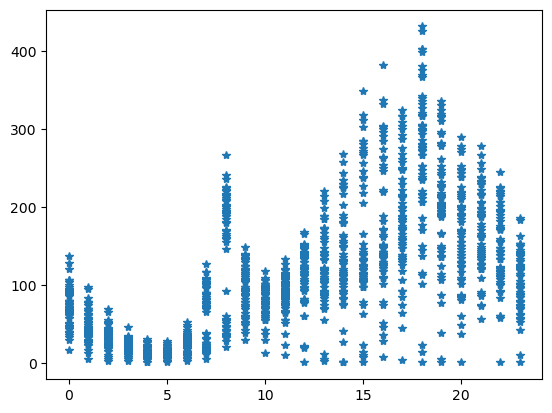

In [29]:
plt.plot('hour', 'count', '*', data=train)

<AxesSubplot:>

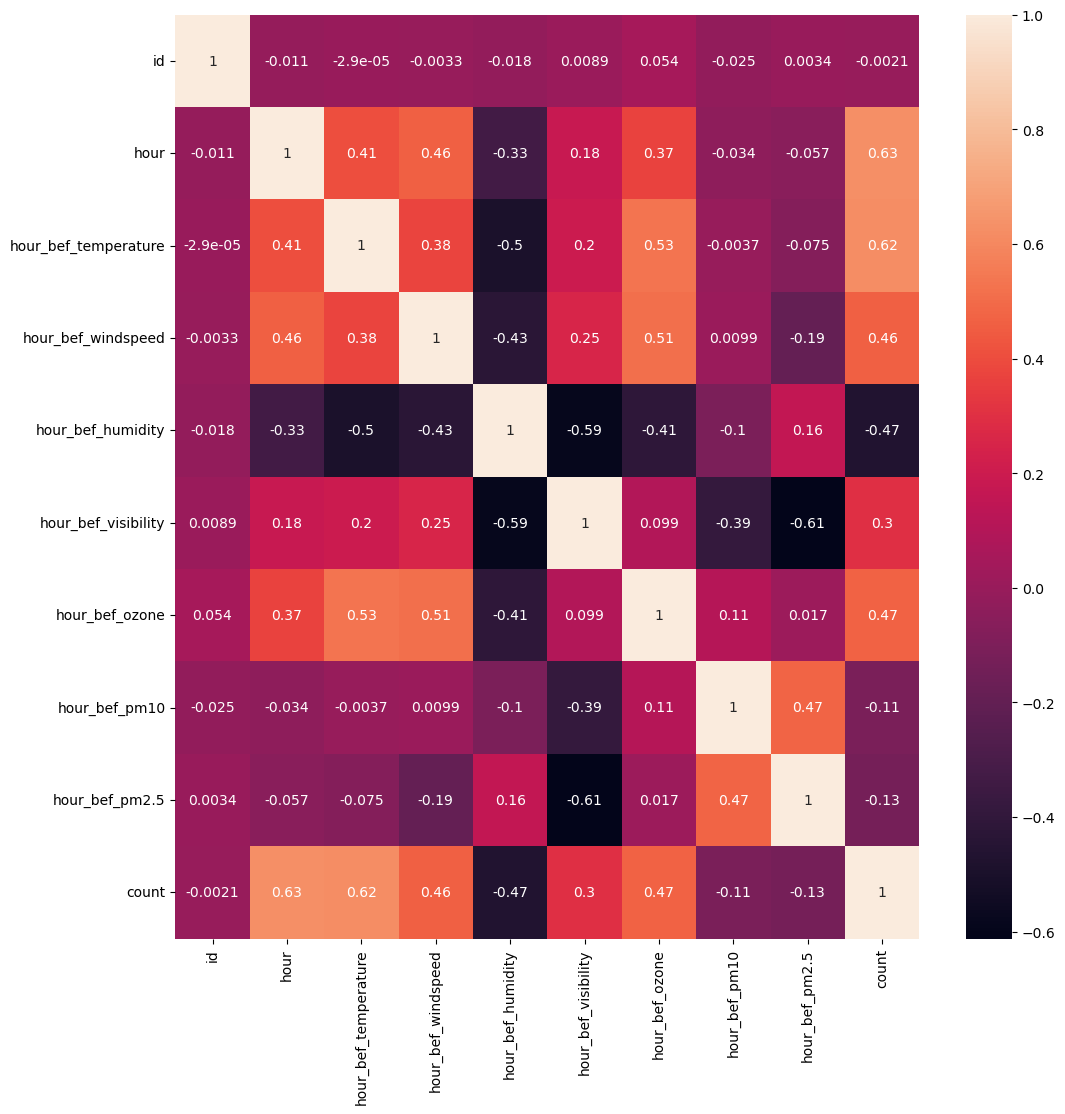

In [30]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(), annot = True)

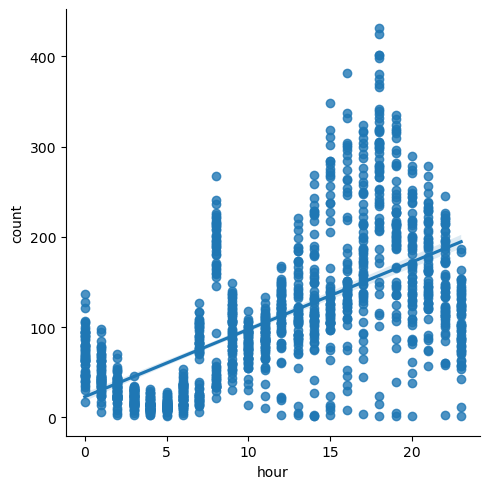

In [31]:
sns.lmplot(x='hour',y='count',data=train)

In [32]:
xfet = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility','hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

In [33]:
xfets = train[xfet].columns

In [34]:
xfets

Index(['hour', 'hour_bef_temperature', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

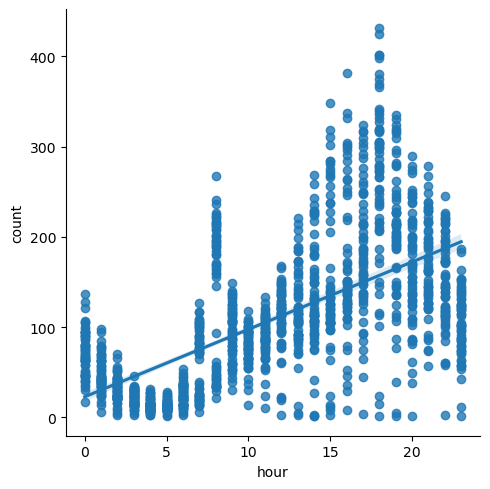

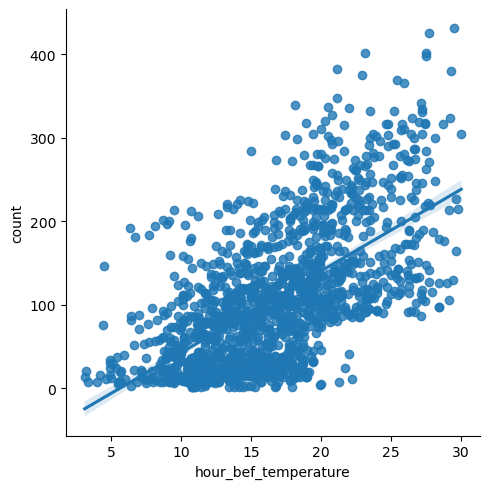

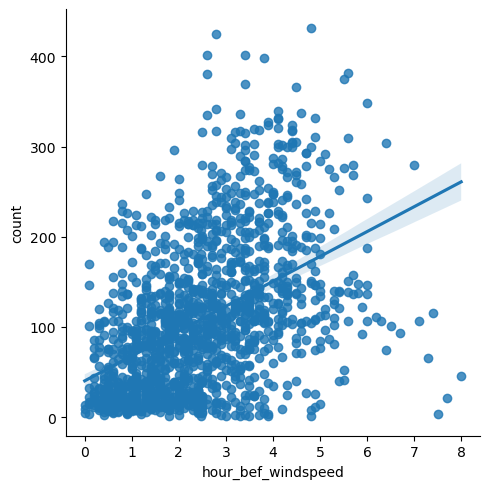

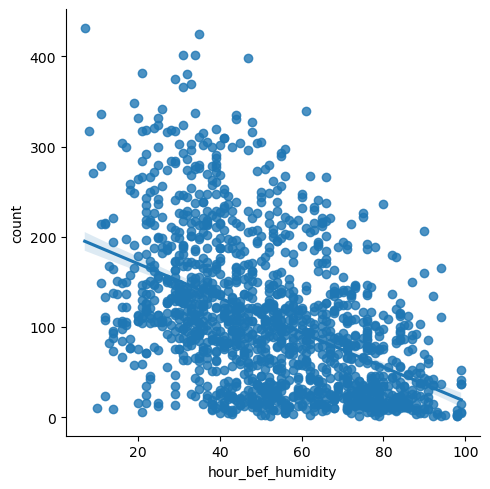

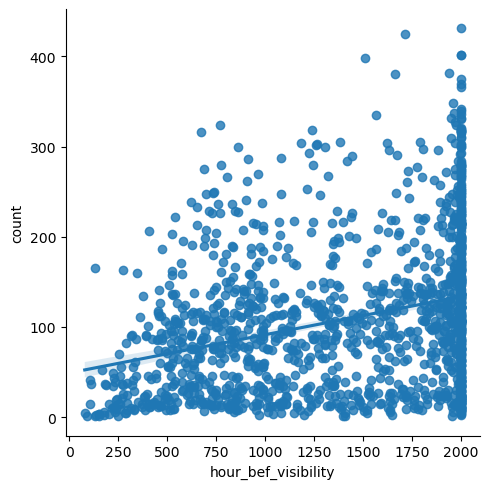

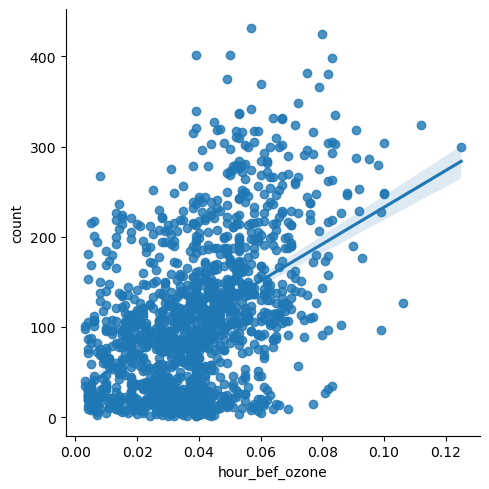

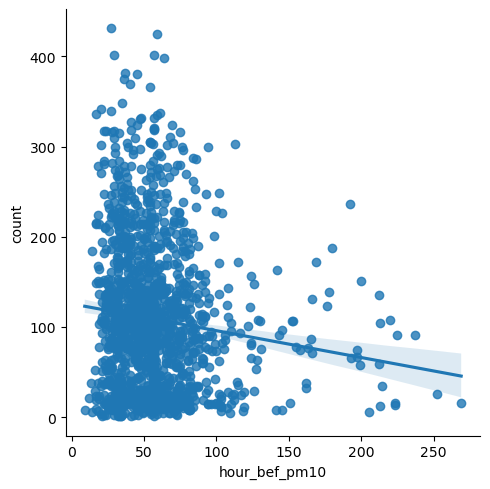

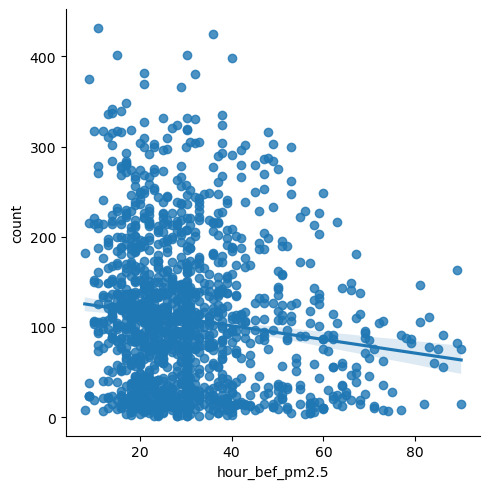

In [35]:
for i in xfets:
    sns.lmplot(x=i, y='count', data=train)

In [36]:
from sklearn.linear_model import LinearRegression #선형회귀

from sklearn.ensemble import RandomForestRegressor #랜덤포레스트
from sklearn.model_selection import GridSearchCV #GVsearch
from sklearn.model_selection import RandomizedSearchCV #RandomizedSearch 

from sklearn.ensemble import GradientBoostingRegressor #그래디언트 부스팅

In [37]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [38]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_ozone', 'hour_bef_windspeed', 'hour_bef_humidity']

In [39]:
X_train = train[features]
y_train = train['count']
X_test = test[features] 

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
lr_predict = lr.predict(X_test)

In [42]:
submission['count'] = lr_predict
submission.to_csv('lr.csv', index=False)

In [43]:
rf = RandomForestRegressor()

In [44]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
pred = model.predict(X_test)

In [46]:
submission = pd.read_csv('./submission.csv')
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [47]:
param = {'min_samples_split': range(1,5),
        'max_depth':range(8,12,2),
        'n_estimators': range(250,450,50)}

In [48]:
gs = GridSearchCV(estimator=rf, param_grid=param, scoring='neg_mean_squared_error',cv=3)

In [49]:
gs.fit(X_train, y_train)

C:\Users\UserK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\UserK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\UserK\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\UserK\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\UserK\anaconda3\lib\site-packages\jo

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(8, 12, 2),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(250, 450, 50)},
             scoring='neg_mean_squared_error')

In [50]:
print('최고 정확도 : ', gs.best_score_)
print('최고 파라미터 : ', gs.best_params_)

최고 정확도 :  -1763.6898667724217
최고 파라미터 :  {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 350}


In [51]:
rf_gs_predict = gs.predict(X_test)

In [52]:
submission['count'] = rf_gs_predict
submission.to_csv('rf_gs.csv', index=False)

In [53]:
rs_model = RandomForestRegressor()

In [54]:
param = {'min_samples_split': range(12,15),
        'max_depth': range(8,11),
        'n_estimators': range(222,225)}

In [55]:
rs = RandomizedSearchCV(estimator=rs_model, param_distributions=param, scoring = 'neg_mean_squared_error', cv=3)

In [56]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(8, 11),
                                        'min_samples_split': range(12, 15),
                                        'n_estimators': range(222, 225)},
                   scoring='neg_mean_squared_error')

In [57]:
print('최고 정확도 : ', rs.best_score_)
print('최고 파라미터 : ', rs.best_params_)

최고 정확도 :  -1758.2080495764421
최고 파라미터 :  {'n_estimators': 224, 'min_samples_split': 13, 'max_depth': 10}


In [58]:
rf_rs_predict = rs.predict(X_test)

In [59]:
submission['count'] = rf_rs_predict
submission.to_csv('rf_rs.csv', index=False)